In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import xarray as xr

In [2]:
def calc_rmse(column_a, column_b):
    return np.power(np.nanmean(((column_a - column_b) ** 2)), .5)

In [3]:
path_to_comparison_data = '/data/comparison_data/US-Prr-monthly.csv'
cell_x_coord = 1
cell_y_coord = 0

In [4]:
comparison_data=pd.read_csv(path_to_comparison_data)
comparison_data = comparison_data.replace(-9999.0, np.nan)
comparison_data['date'] = pd.to_datetime(comparison_data['m_y'])
comparison_data['year'] = comparison_data['date'].dt.year

In [5]:
comparison_data_co2 = comparison_data.groupby(by=['year']).mean().reset_index()[['year','CO2']]
comparison_data_co2

,year,CO2
0,2010,408.165414
1,2011,378.589491
2,2012,374.468795
3,2013,401.599537
4,2014,393.545360
5,2015,373.401040
6,2016,350.958151
7,2017,NaN
8,2018,NaN
9,2019,NaN


In [6]:
comparison_data['month'] = pd.DatetimeIndex(comparison_data['date']).month
comparison_data_pr = comparison_data.groupby(by=['year', 'month']).sum().reset_index()['Precip (mm)']
comparison_data = comparison_data.groupby(by=['year', 'month']).mean().reset_index().drop(columns=['Unnamed: 0'])
comparison_data_pr[(comparison_data['month']<10)&(comparison_data['year']==2010)]=np.nan
comparison_data['Precip (mm)'] = comparison_data_pr
comparison_data['m_y'] = pd.to_datetime(comparison_data['month'].astype(str) + '-'+ comparison_data['year'].astype(str), format='%m-%Y')
comparison_data.dtypes

year                        int64
month                       int64
Year_x                    float64
Month_x                   float64
GPP1 (gC/m2/d)            float64
RECO1 (gC/m2/d)           float64
NEE1 (gC/m2/d)            float64
GPP2 (gC/m2/d)            float64
RECO2 (gC/m2/d)           float64
NEE2 (gC/m2/d)            float64
Precip (mm)               float64
Year_y                    float64
Month_y                   float64
TA                        float64
RH                        float64
PA                        float64
D_SNOW                    float64
SWC_1_1_1                 float64
SWC_1_2_1                 float64
SWC_1_3_1                 float64
SWC_1_4_1                 float64
SWC_1_5_1                 float64
TS_1_1_1                  float64
TS_1_2_1                  float64
TS_1_3_1                  float64
TS_1_4_1                  float64
TS_1_5_1                  float64
TS_1_6_1                  float64
CO2                       float64
SW_IN         

!ls /data/input-catalog/caribou-poker/

In [7]:
ds = nc.Dataset('/data/input-catalog/cpcrw_towers_upscaled/poker_flats_tower_tem.nc')
ds.variables

{'x': <class 'netCDF4._netCDF4.Variable'>
 int32 x(X)
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 int32 y(Y)
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of -2147483647 used,
 'nirr': <class 'netCDF4._netCDF4.Variable'>
 float32 nirr(time, Y, X)
     _FillValue: -9999.0
 unlimited dimensions: 
 current shape = (1464, 1, 1)
 filling on,
 'precip': <class 'netCDF4._netCDF4.Variable'>
 float32 precip(time, Y, X)
     _FillValue: -9999.0
 unlimited dimensions: 
 current shape = (1464, 1, 1)
 filling on,
 'tair': <class 'netCDF4._netCDF4.Variable'>
 float32 tair(time, Y, X)
     _FillValue: -9999.0
 unlimited dimensions: 
 current shape = (1464, 1, 1)
 filling on,
 'vapor_press': <class 'netCDF4._netCDF4.Variable'>
 float32 vapor_press(time, Y, X)
     _FillValue: -9999.0
 unlimited dimensions: 
 current shape = (1464, 1, 1)
 filling on,
 'time': <class 'netCDF4

In [8]:
tair = ds.variables['tair'][:,0,0]
nirr = ds.variables['nirr'][:,0,0]
vapor_press = ds.variables['vapor_press'][:,0,0]
precip = ds.variables['precip'][:,0,0]

starting_date = pd.to_datetime('1901-1-1 0:0:0')
timedeltas=[0 + i for i in range(0, np.shape(ds.variables['tair'])[0])]
#dates = [starting_date + pd.Timedelta(t, 'd') for t in timedeltas]
dates = [starting_date + pd.Timedelta(t, 'd') for t in ds.variables['time'][:]]
len(dates)


1464

In [10]:
tem_output_df = pd.DataFrame({'date':dates, 'tair':tair, 'nirr': nirr, 'precip': precip, 'vapor_press': vapor_press})
tem_output_df['month'] = pd.DatetimeIndex(tem_output_df['date']).month
tem_output_df['year'] = pd.DatetimeIndex(tem_output_df['date']).year

In [11]:
#tem_output_df = tem_output_df.groupby(by=['year', 'month']).mean().reset_index()
#tem_output_df['m_y'] = pd.to_datetime(tem_output_df['month'].astype(str) + '-'+ tem_output_df['year'].astype(str), format='%m-%Y')
tem_output_df.dtypes

date           datetime64[ns]
tair                  float32
nirr                  float32
precip                float32
vapor_press           float32
month                   int64
year                    int64
dtype: object

In [12]:
comparison_data.columns

Index(['year', 'month', 'Year_x', 'Month_x', 'GPP1 (gC/m2/d)',
       'RECO1 (gC/m2/d)', 'NEE1 (gC/m2/d)', 'GPP2 (gC/m2/d)',
       'RECO2 (gC/m2/d)', 'NEE2 (gC/m2/d)', 'Precip (mm)', 'Year_y', 'Month_y',
       'TA', 'RH', 'PA', 'D_SNOW', 'SWC_1_1_1', 'SWC_1_2_1', 'SWC_1_3_1',
       'SWC_1_4_1', 'SWC_1_5_1', 'TS_1_1_1', 'TS_1_2_1', 'TS_1_3_1',
       'TS_1_4_1', 'TS_1_5_1', 'TS_1_6_1', 'CO2', 'SW_IN', 'm_y'],
      dtype='object')

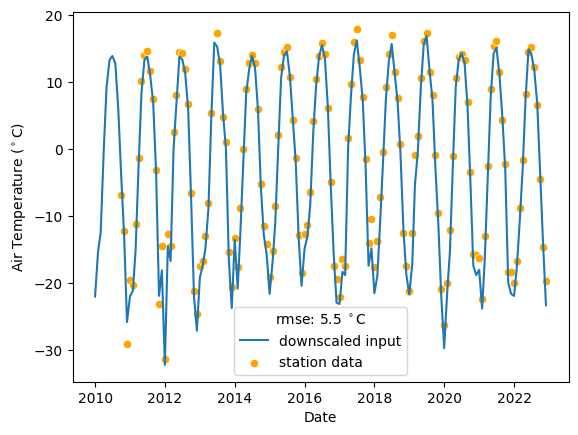

In [14]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='tair', label = 'downscaled input')
sns.scatterplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'TA', label='station data', color='orange')
plt.ylabel('Air Temperature ($^\circ$C)')
plt.xlabel('Date')
rmse = np.around(calc_rmse(tem_output_df['tair'], comparison_data['TA']), decimals=1)
ax.legend(title='rmse: {} $^\circ$C'.format(rmse), title_fontsize=10)

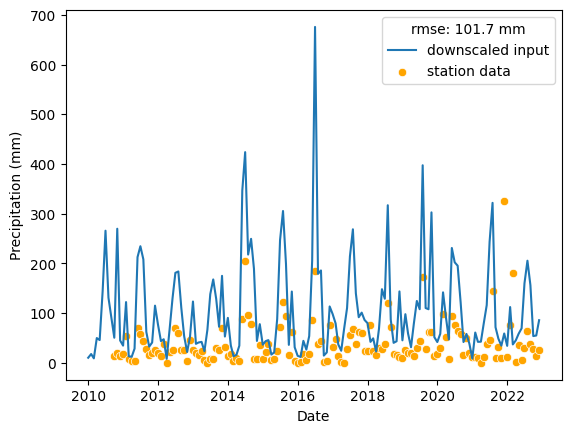

In [15]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='precip', label = 'downscaled input')
sns.scatterplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'Precip (mm)', label='station data', color='orange')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
rmse=np.around(calc_rmse(tem_output_df['precip'], comparison_data['Precip (mm)']), decimals=1)
ax.legend(title='rmse: {} mm'.format(rmse), title_fontsize=10)

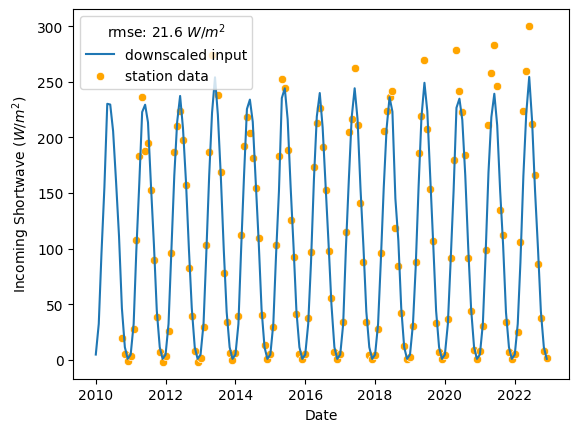

In [16]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='nirr', label = 'downscaled input')
sns.scatterplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= 'SW_IN', label='station data', color='orange')
plt.ylabel('Incoming Shortwave ($W/m^2$)')
plt.xlabel('Date')
rmse=np.around(calc_rmse(tem_output_df['nirr'], comparison_data['SW_IN']), decimals=1)
ax.legend(title='rmse: {} $W/m^2$'.format(rmse), title_fontsize=10)

In [17]:
comparison_data['RH']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
151    76.147191
152    79.237694
153    83.060688
154    83.698106
155    75.336600
Name: RH, Length: 156, dtype: float64

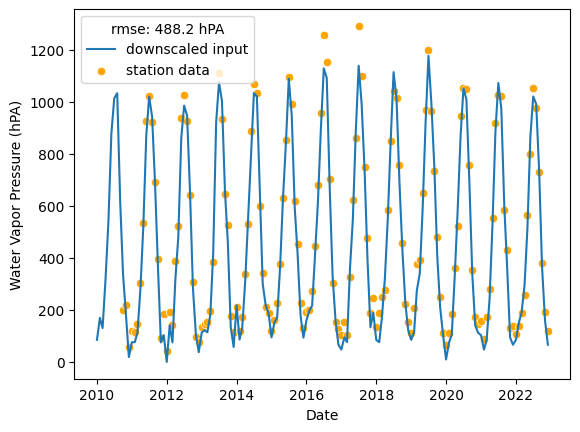

In [26]:
fig, ax = plt.subplots()
dt_comp = pd.to_datetime('2010-01-01')
t_kelvin = comparison_data['TA'] + 273.15
sat_vap_press = (611*np.exp((17.27*comparison_data['TA'])/t_kelvin))/100
vap_press = ((comparison_data['RH']/100) * sat_vap_press)
sns.lineplot(data = tem_output_df[tem_output_df['date']>=dt_comp], x='date', y='vapor_press', label = 'downscaled input')
sns.scatterplot(data = comparison_data[comparison_data['m_y']>=dt_comp], x = 'm_y', y= vap_press*100, label='station data', color='orange')
plt.ylabel('Water Vapor Pressure (hPA)')
plt.xlabel('Date')
rmse=np.around(calc_rmse(tem_output_df['vapor_press'], vap_press), decimals=1)
ax.legend(title='rmse: {} hPA'.format(rmse), title_fontsize=10)

In [19]:
tem_co2 = nc.Dataset('/data/input-catalog/cpcrw_towers_upscaled/co2_all.nc')

In [20]:
tem_co2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): year(121)
    variables(dimensions): float32 co2(year), int64 year(year)
    groups: 

In [21]:
tem_co2.variables['year'][:]

masked_array(data=[1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
                   1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918,
                   1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
                   1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
                   1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
                   1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
                   1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
                   1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
                   1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
                   1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
                   1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                   2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
                   2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                   2018, 2019, 2020, 2021],
       

In [22]:
tem_co2_df = pd.DataFrame({'year': tem_co2.variables['year'][:], 'co2': tem_co2.variables['co2'][:]})
tem_co2_df

,year,co2
0,1901,296.311005
1,1902,296.661011
2,1903,297.040009
3,1904,297.441010
4,1905,297.859985
...,...,...
116,2017,406.760010
117,2018,408.720001
118,2019,411.649994
119,2020,414.209991


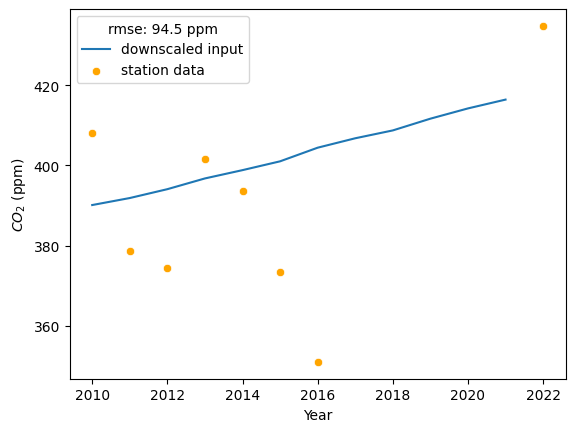

In [23]:
fig, ax = plt.subplots()
sns.lineplot(data = tem_co2_df[tem_co2_df['year']>=2010], x='year', y='co2', label = 'downscaled input')
sns.scatterplot(data = comparison_data_co2[comparison_data_co2['year']>=2010], x = 'year', y= 'CO2', label='station data', color='orange')
plt.ylabel('$CO_{2}$ (ppm)')
plt.xlabel('Year')
rmse=np.around(calc_rmse(tem_co2_df['co2'], comparison_data_co2['CO2']), decimals=1)
ax.legend(title='rmse: {} ppm'.format(rmse), title_fontsize=10)